<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula08b_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000, test_split=0.2)
type(train_data)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


numpy.ndarray

In [3]:
train_data[0:1]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
      dtype=object)

In [4]:
len(train_data[0])

87

In [5]:
len(set(train_labels))

46

In [6]:
def decode_words(word_index, sentence):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sentence])

decode_words(reuters.get_word_index(), train_data[0])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
print(train_labels[0:10])

[ 3  4  3  4  4  4  4  3  3 16]


In [8]:
from re import X
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train.shape, X_test.shape, X_train[:3, :32]

((8982, 10000),
 (2246, 10000),
 array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
         1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.]]))

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
X_train = tokenizer.sequences_to_matrix(train_data)
X_test = tokenizer.sequences_to_matrix(test_data)
X_train.shape, X_test.shape, X_train[:3, :32]

((8982, 10000),
 (2246, 10000),
 array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
         1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.]]))

In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
n_val = 1000
X_val = X_train[:n_val]
partial_X_train = X_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]

In [17]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.4035 - loss: 3.1970 - val_accuracy: 0.6260 - val_loss: 1.7980
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6595 - loss: 1.6299 - val_accuracy: 0.6900 - val_loss: 1.3657
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7259 - loss: 1.2358 - val_accuracy: 0.7460 - val_loss: 1.1966
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7958 - loss: 0.9587 - val_accuracy: 0.7610 - val_loss: 1.0904
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8265 - loss: 0.8232 - val_accuracy: 0.7730 - val_loss: 1.0322
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8481 - loss: 0.6931 - val_accuracy: 0.7960 - val_loss: 0.9490
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8765 - loss: 0.5701 - val_accuracy: 0.8040 - val_loss: 0.9127
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8950 - loss: 0.4862 - val_accuracy: 0.8030 - 

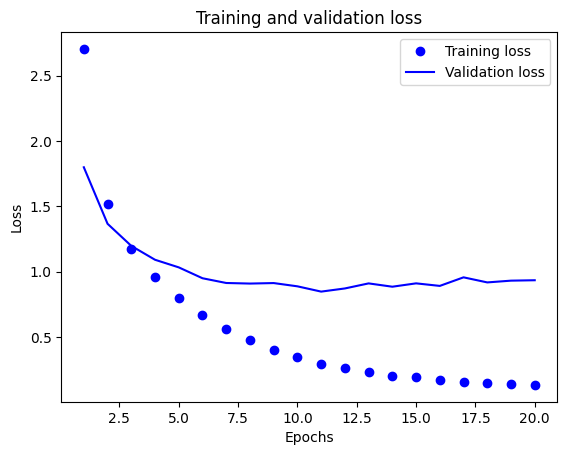

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

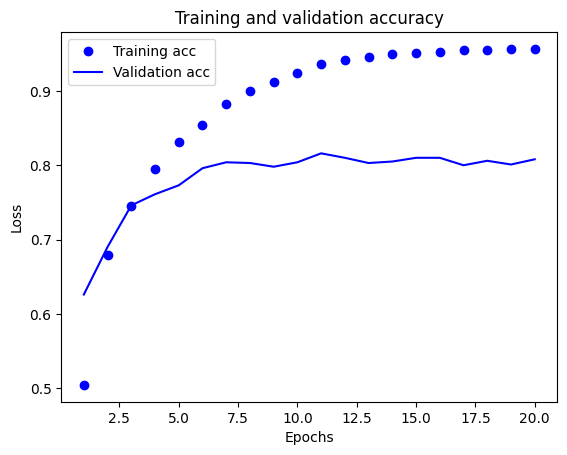

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9598 - loss: 0.1233 - val_accuracy: 0.8110 - val_loss: 0.9648
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9621 - loss: 0.1170 - val_accuracy: 0.8110 - val_loss: 0.9672
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9640 - loss: 0.1085 - val_accuracy: 0.8020 - val_loss: 1.0110
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9605 - loss: 0.1150 - val_accuracy: 0.8140 - val_loss: 0.9806
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9620 - loss: 0.1070 - val_accuracy: 0.8050 - val_loss: 0.9911
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9611 - loss: 0.1025 - val_accuracy: 0.7920 - val_loss: 1.0641
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9670 - loss: 0.1003 - val_accuracy: 0.8070 - val_loss: 1.0184
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9622 - loss: 0.1021 - val_accuracy: 0.8070 - v

In [21]:
ypred = model.predict(X_test)
ypred

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[3.2769623e-08, 9.4871666e-07, 1.4074187e-08, ..., 1.9363380e-10,
        1.2872488e-11, 7.0560011e-09],
       [1.9783906e-04, 8.2925679e-03, 5.3159508e-04, ..., 4.2442088e-07,
        2.3345636e-05, 1.9464060e-06],
       [5.0943354e-06, 9.9845099e-01, 1.8167420e-05, ..., 1.4180532e-07,
        1.4353504e-05, 9.7559246e-07],
       ...,
       [1.3531458e-06, 1.5723523e-04, 2.2169377e-05, ..., 1.2956039e-06,
        9.5670055e-07, 4.7213935e-06],
       [2.9291676e-03, 2.6028629e-02, 9.3496370e-04, ..., 1.3682769e-04,
        1.6227250e-05, 8.8630186e-05],
       [6.0153375e-06, 9.4674325e-01, 4.2507195e-04, ..., 9.4155448e-06,
        8.4525782e-05, 3.7009304e-06]], dtype=float32)

In [22]:
ypred[0]

array([3.27696235e-08, 9.48716661e-07, 1.40741871e-08, 9.80795562e-01,
       1.84363183e-02, 6.63991262e-09, 7.10710424e-07, 2.15157087e-07,
       1.38960066e-04, 3.57263197e-08, 3.39744105e-07, 2.49993143e-04,
       2.59064109e-07, 9.33630963e-06, 1.03243153e-07, 1.73518999e-09,
       1.13608739e-05, 2.35312410e-08, 1.87673628e-08, 2.71391236e-05,
       2.97517836e-04, 1.69992873e-05, 1.34461375e-08, 3.32521033e-08,
       1.57053748e-09, 2.78675971e-09, 6.52501209e-09, 2.13966601e-07,
       3.25380114e-07, 6.89332137e-06, 1.49625907e-06, 4.46604993e-08,
       3.51871819e-07, 6.44313769e-10, 1.14918215e-07, 8.40376124e-09,
       3.12387988e-06, 7.79843603e-08, 1.03397646e-07, 5.08418168e-07,
       4.82381722e-07, 1.56991319e-07, 1.86581374e-07, 1.93633803e-10,
       1.28724878e-11, 7.05600112e-09], dtype=float32)

In [23]:
np.argmax(ypred[0])

np.int64(3)

In [24]:
results = model.evaluate(X_test, y_test)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8000 - loss: 1.0786


[1.13718843460083, 0.7938557267189026]

In [25]:
results = model.evaluate(partial_X_train, partial_y_train)
results

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9663 - loss: 0.0883


[0.0824916735291481, 0.9680531024932861]

In [26]:
results = model.evaluate(X_val, y_val)
results

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8120 - loss: 0.9637


[1.0129339694976807, 0.8050000071525574]

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.4439 - loss: 3.1741 - val_accuracy: 0.6390 - val_loss: 1.9732
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6888 - loss: 1.7094 - val_accuracy: 0.6870 - val_loss: 1.4414
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7517 - loss: 1.2207 - val_accuracy: 0.7540 - val_loss: 1.1907
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8001 - loss: 0.9819 - val_accuracy: 0.7810 - val_loss: 1.0601
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8398 - loss: 0.7961 - val_accuracy: 0.7960 - val_loss: 0.9818
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8678 - loss: 0.6763 - val_accuracy: 0.8050 - val_loss: 0.9251
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8834 - loss: 0.5986 - val_accuracy: 0.8110 - val_loss: 0.8914
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8951 - loss: 0.5089 - val_accuracy: 0.8180 - 

In [34]:
model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.3539 - loss: 3.4038 - val_accuracy: 0.5870 - val_loss: 2.5318
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6265 - loss: 2.2947 - val_accuracy: 0.6450 - val_loss: 1.9057
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6853 - loss: 1.7107 - val_accuracy: 0.6810 - val_loss: 1.5492
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7251 - loss: 1.3756 - val_accuracy: 0.7140 - val_loss: 1.3349
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7705 - loss: 1.1245 - val_accuracy: 0.7430 - val_loss: 1.2021
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7950 - loss: 0.9698 - val_accuracy: 0.7600 - val_loss: 1.1096
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8147 - loss: 0.8597 - val_accuracy: 0.7740 - val_loss: 1.0478
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8387 - loss: 0.7493 - val_accuracy: 0.7840 - 

In [35]:
results = model.evaluate(X_test, y_test)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8060 - loss: 0.8754


[0.9024341702461243, 0.7947462201118469]

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Definição do modelo
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Ensure the linear layers are created with the default float dtype
        self.fc1 = nn.Linear(10000, 32)
        self.fc2 = nn.Linear(32, 46)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.fc1(x))

        x = self.fc2(x) # Output logits for CrossEntropyLoss
        return x

# Inicialização do modelo
model = MyModel()

# Definição da função de perda e do otimizador
# Use CrossEntropyLoss which expects logits as input and applies softmax internally
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Convert NumPy arrays to PyTorch tensors with dtype=torch.float
# Also convert labels to long tensor as CrossEntropyLoss expects class indices
partial_X_train_tensor = torch.tensor(partial_X_train, dtype=torch.float)
partial_y_train_tensor = torch.tensor(np.argmax(partial_y_train, axis=1), dtype=torch.long) # Convert one-hot to class indices
X_val_tensor = torch.tensor(X_val, dtype=torch.float)
y_val_tensor = torch.tensor(np.argmax(y_val, axis=1), dtype=torch.long) # Convert one-hot to class indices
X_test_tensor = torch.tensor(X_test, dtype=torch.float)
y_test_tensor = torch.tensor(np.argmax(y_test, axis=1), dtype=torch.long) # Convert one-hot to class indices


# Treinamento do modelo
num_epochs = 20
batch_size = 512 # Note: This batch_size is not used in the current loop structure.
                 # For actual batching, you would need a DataLoader.

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Pass the float tensor to the model
    outputs = model(partial_X_train_tensor)
    # Pass the logits and long tensor labels to the criterion
    loss = criterion(outputs, partial_y_train_tensor)

    loss.backward()
    optimizer.step()

    # Validação
    model.eval()
    with torch.no_grad():
        # Pass the float tensor to the model
        val_outputs = model(X_val_tensor)
        # Pass the logits and long tensor labels to the criterion
        val_loss = criterion(val_outputs, y_val_tensor)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Avaliação do modelo
model.eval()
with torch.no_grad():
    # Pass the float tensor to the model
    test_outputs = model(X_test_tensor)
    # Pass the logits and long tensor labels to the criterion
    test_loss = criterion(test_outputs, y_test_tensor)

print(f"Test Loss: {test_loss.item():.4f}")

Epoch [1/20], Loss: 3.8435, Val Loss: 3.3938
Epoch [2/20], Loss: 3.3732, Val Loss: 2.9937
Epoch [3/20], Loss: 2.9349, Val Loss: 2.6529
Epoch [4/20], Loss: 2.5802, Val Loss: 2.3955
Epoch [5/20], Loss: 2.3006, Val Loss: 2.1954
Epoch [6/20], Loss: 2.0871, Val Loss: 2.0536
Epoch [7/20], Loss: 1.9238, Val Loss: 1.9289
Epoch [8/20], Loss: 1.7945, Val Loss: 1.8402
Epoch [9/20], Loss: 1.6836, Val Loss: 1.7483
Epoch [10/20], Loss: 1.5884, Val Loss: 1.6795
Epoch [11/20], Loss: 1.5008, Val Loss: 1.6141
Epoch [12/20], Loss: 1.4274, Val Loss: 1.5637
Epoch [13/20], Loss: 1.3610, Val Loss: 1.5147
Epoch [14/20], Loss: 1.3023, Val Loss: 1.4754
Epoch [15/20], Loss: 1.2490, Val Loss: 1.4364
Epoch [16/20], Loss: 1.2005, Val Loss: 1.4048
Epoch [17/20], Loss: 1.1558, Val Loss: 1.3726
Epoch [18/20], Loss: 1.1149, Val Loss: 1.3471
Epoch [19/20], Loss: 1.0766, Val Loss: 1.3197
Epoch [20/20], Loss: 1.0410, Val Loss: 1.2981
Test Loss: 1.3511


In [42]:

# Predict on the test data
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs.data, 1)

# Calculate accuracy
# y_test_tensor contains the true class indices
accuracy = accuracy_score(y_test_tensor.cpu().numpy(), predicted.cpu().numpy())

print(f'Accuracy of the network on the {len(X_test_tensor)} test instances: {accuracy * 100:.2f} %')

Accuracy of the network on the 2246 test instances: 71.02 %
